# Домашнее задание №3

# Выполнил Салабай В.Р. (ФПэ-01-22)

Задание №1 
Для одной из промежуточных ступеней паровой турбины построить графически треугольники скоростей для 10 сечений равномерно распределенных по высоте при следующих исходных данных:

In [90]:
#Загружаем библиотеки
import iapws
import math
from iapws import IAPWS97 as gas
import matplotlib.pyplot as plt

In [91]:
#СИ
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [92]:
n = 10 - #кол-во сечений
p_0 = 16.7 * MPa
t_0 = to_kelvin(520)
p_2 = 14.5 * MPa
D_cp = 0.892
D_korn = 0.8
po_ср = 0.2
alf_1_ср = 13 
delta_beta_deg = 5
fi = 0.97
psi = 0.935
rotation_speed = 50

SyntaxError: invalid syntax (534171245.py, line 1)

In [93]:
D_kray = 2 * D_cp - D_korn
shag = ( D_kray - D_korn)/10 
d = []
for i in range(10):
    d.append(round((D_korn + shag * i),3))

Расчет треугольника скоростей для слоя № 0.8
Проверка
310.22121270908184=310.2212127090819
*************************************************
Расчет треугольника скоростей для слоя № 0.818
Проверка
302.7567641402047=302.7567641402048
*************************************************
Расчет треугольника скоростей для слоя № 0.837
Проверка
294.8600556129094=294.86005561290926
*************************************************
Расчет треугольника скоростей для слоя № 0.855
Проверка
287.3011394454621=287.3011394454621
*************************************************
Расчет треугольника скоростей для слоя № 0.874
Проверка
279.1643877109136=279.1643877109136
*************************************************
Расчет треугольника скоростей для слоя № 0.892
Проверка
271.2247711942692=271.22477119426924
*************************************************
Расчет треугольника скоростей для слоя № 0.91
Проверка
262.9686941887084=262.9686941887084
*************************************************
Расчет

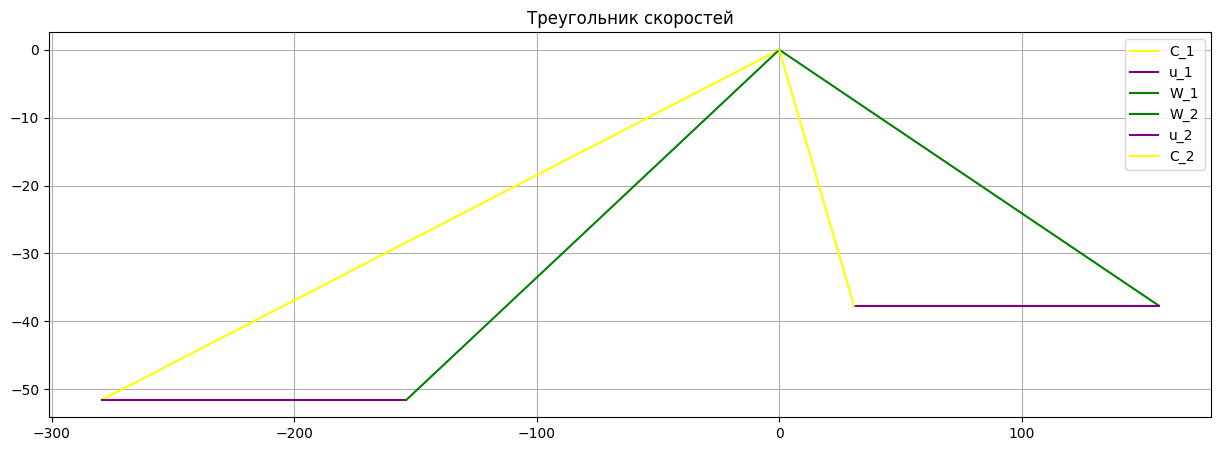

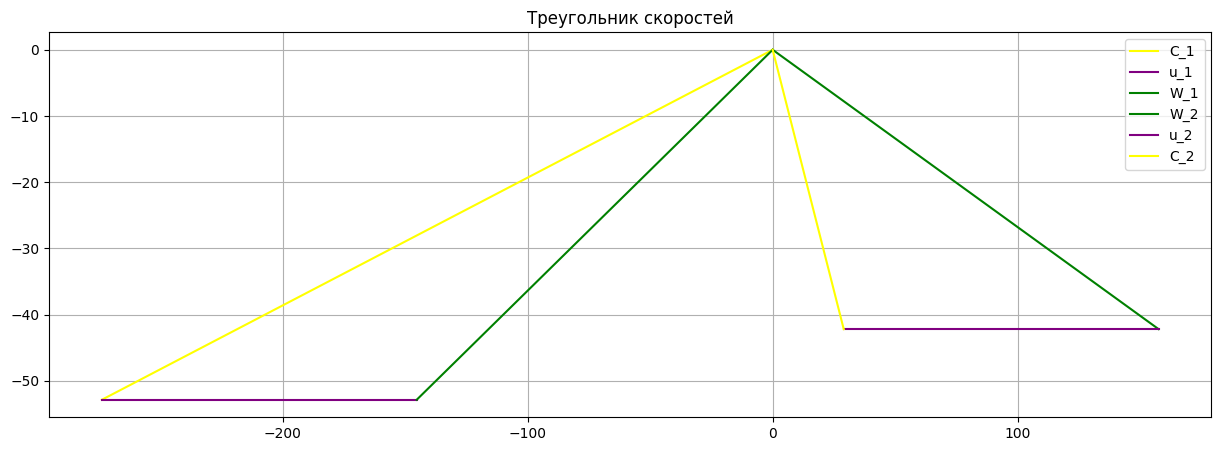

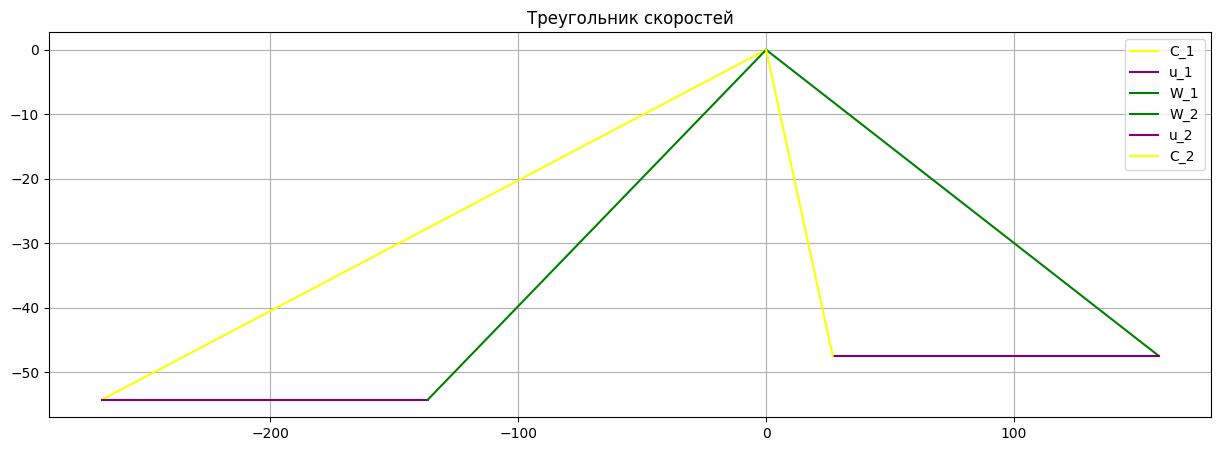

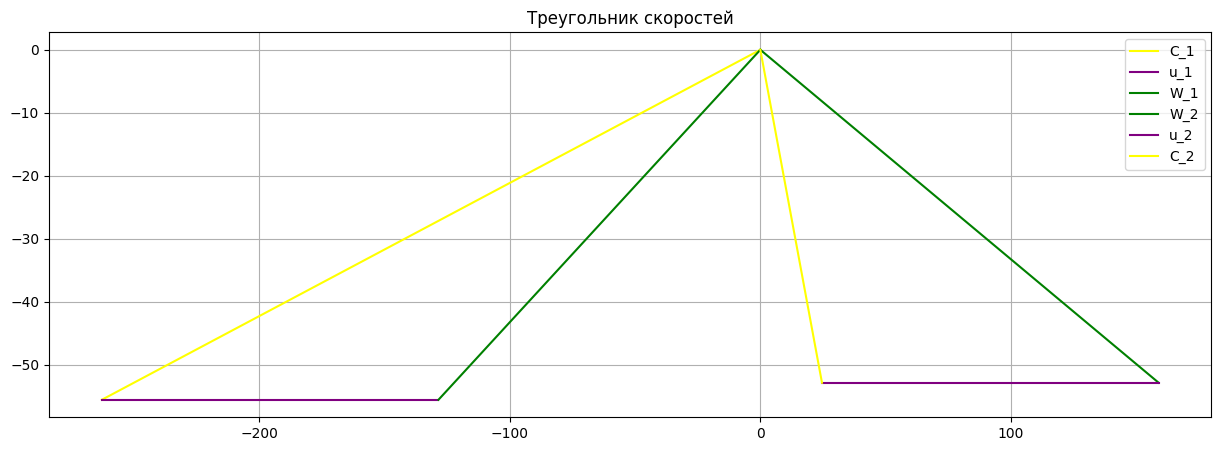

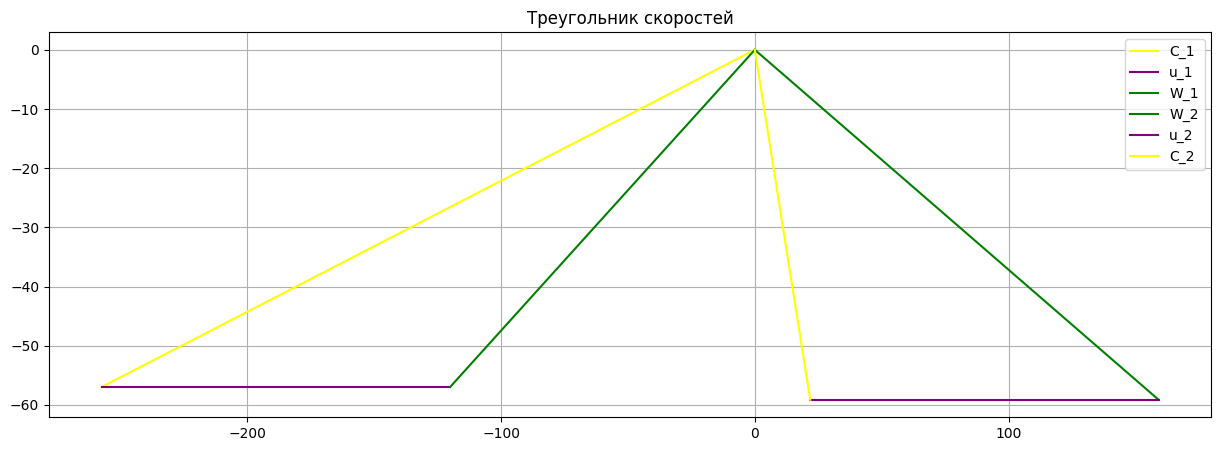

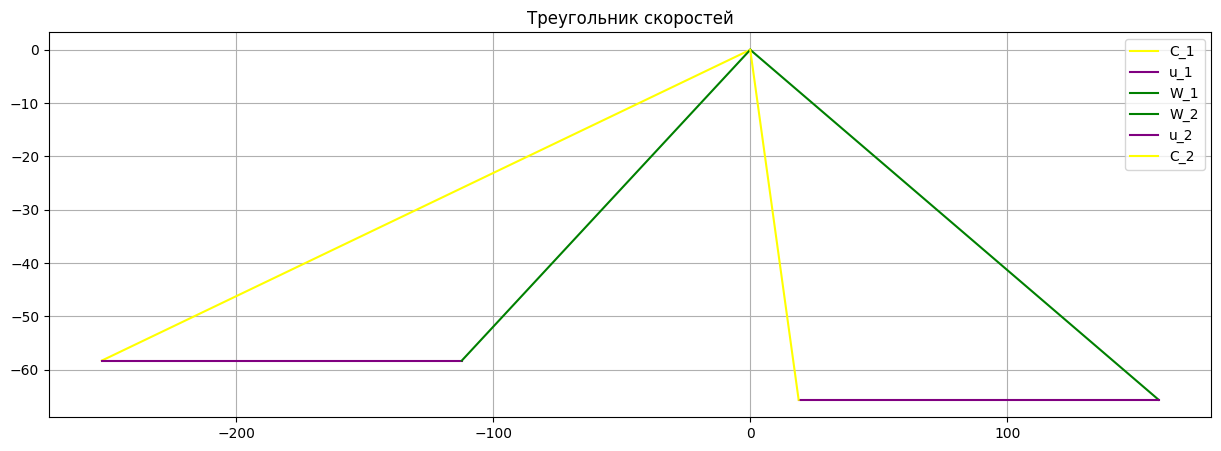

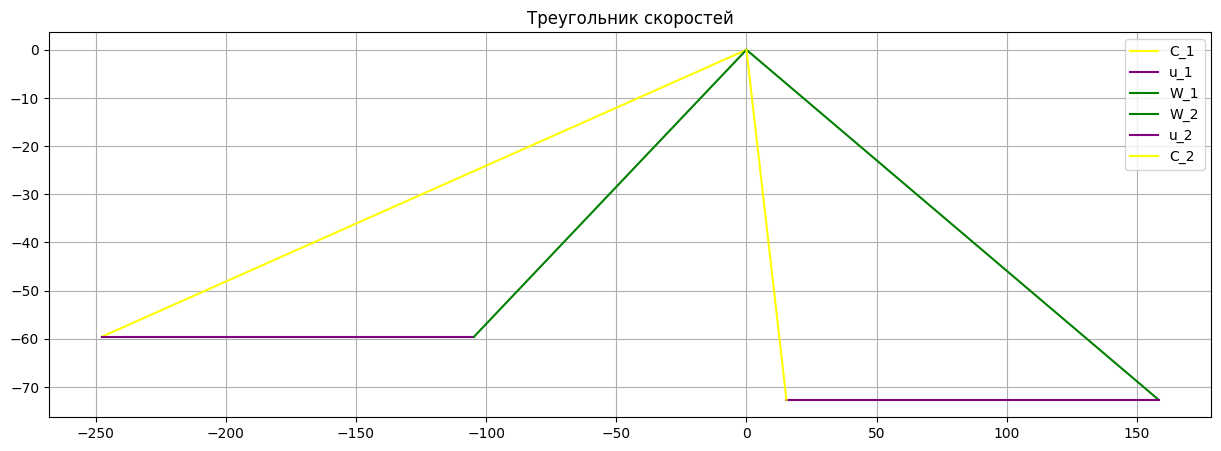

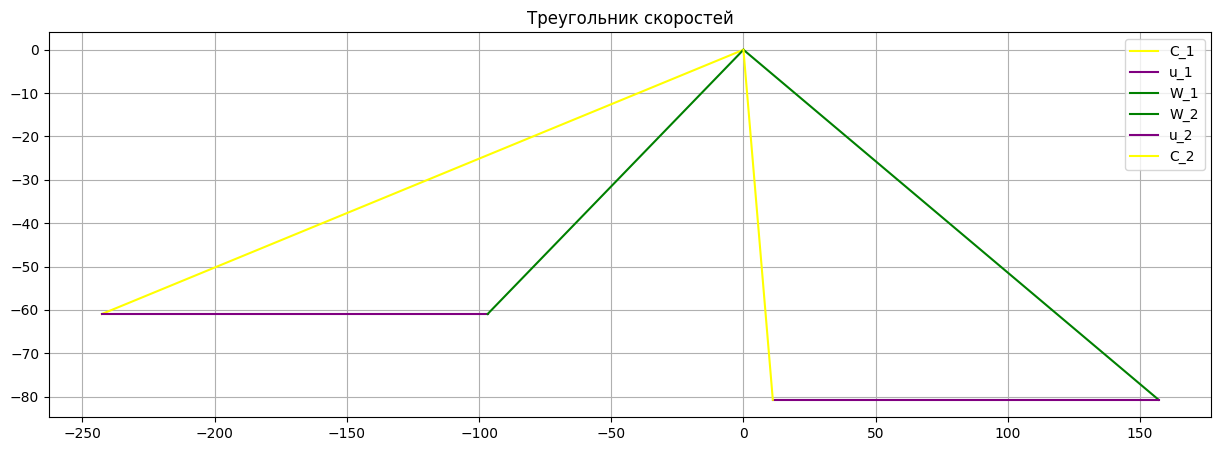

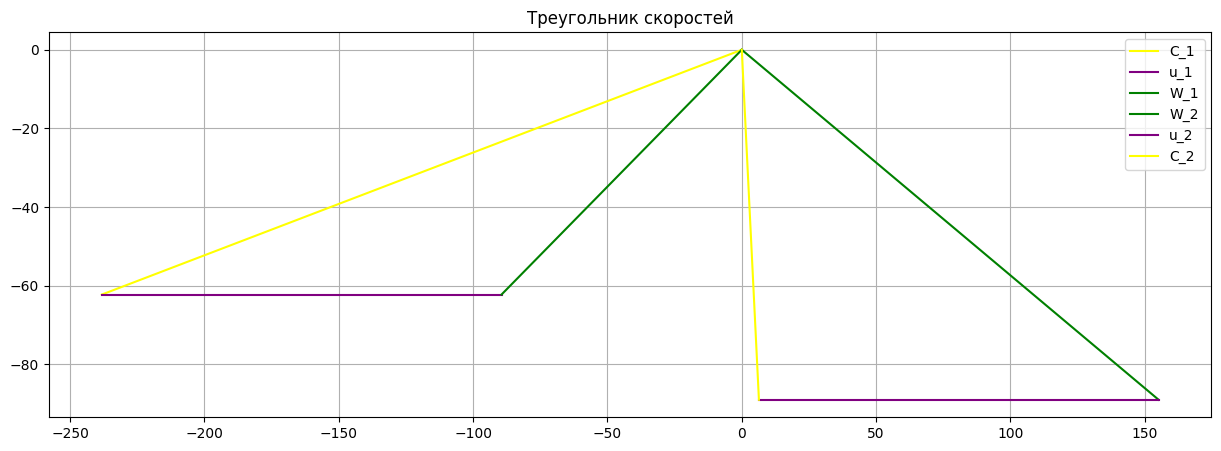

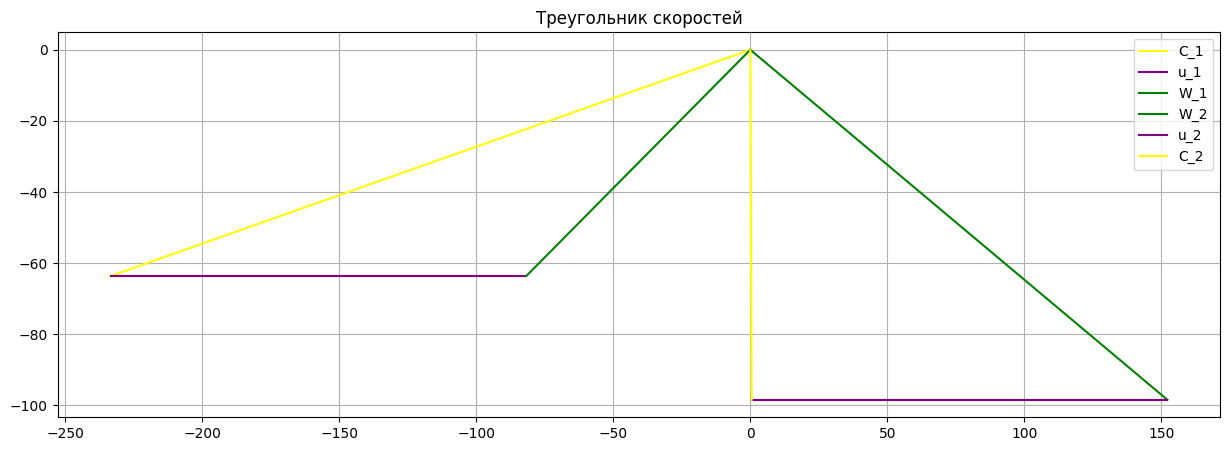

In [94]:
for D in d:
    print (f'Расчет треугольника скоростей для слоя № {D}')
#Значения для расчета
    degree_of_reaction = -((D/D_cp)**(-1.7)*(1-po_ср)-1)
    alpha_1_deg = ((D/D_cp)**(2)*alf_1_ср)
#Рассчитываем 
    inlet_point = gas(P=p_0 * unit, T=t_0)
    outlet_point = gas(P=p_2 * unit, s=inlet_point.s)
    theoretical_heat_drop = inlet_point.h - outlet_point.h
    stator_heat_drop = theoretical_heat_drop * (1 - degree_of_reaction) 
    rotor_heat_drop = theoretical_heat_drop * degree_of_reaction
    sin_alpha_1 = math.sin(math.radians(alpha_1_deg))
    cos_alpha_1 = math.cos(math.radians(alpha_1_deg))

    c_1t = (2 * 1000 * stator_heat_drop) ** 0.5
    c_1 = c_1t * fi
    u = math.pi * D * rotation_speed
    
    w_1 = (c_1 ** 2 + u ** 2 - 2 * c_1 * u * cos_alpha_1) ** 0.5
    w_2t = (w_1 ** 2 + 2 * rotor_heat_drop * 1000) ** 0.5
    w_2 = w_2t * psi
    
    beta_1 = math.atan(sin_alpha_1 / (cos_alpha_1 - u / c_1))
    beta_1_deg = math.degrees(beta_1)
    beta_2_deg = beta_1_deg - delta_beta_deg
    sin_beta_2 = math.sin(math.radians(beta_2_deg))
    cos_beta_2 = math.cos(math.radians(beta_2_deg))
    
    c_2 = (w_2 ** 2 + u ** 2 - 2 * w_2 * u * cos_beta_2) ** 0.5

#Вектора 
    c1_plot = [[0, -c_1 * cos_alpha_1], [0, -c_1 * sin_alpha_1]]
    u1_plot = [[-c_1 * cos_alpha_1, -c_1 * cos_alpha_1 + u], [-c_1 * sin_alpha_1, -c_1 * sin_alpha_1]]
    w1_plot = [[0, -c_1 * cos_alpha_1 + u], [0, -c_1 * sin_alpha_1]]

    w2_plot = [[0, w_2 * cos_beta_2], [0, -w_2 * sin_beta_2]]
    u2_plot = [[w_2 * cos_beta_2, w_2 * cos_beta_2 - u], [-w_2 * sin_beta_2, -w_2 * sin_beta_2]]
    c2_plot = [[0, w_2 * cos_beta_2 - u], [0, -w_2 * sin_beta_2]]
#Строим график
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.plot(c1_plot[0], c1_plot[1], label='C_1', c='yellow')
    ax.plot(u1_plot[0], u1_plot[1], label='u_1', c='purple')
    ax.plot(w1_plot[0], w1_plot[1], label='W_1', c='green')

    ax.plot(w2_plot[0], w2_plot[1], label='W_2', c='green')
    ax.plot(u2_plot[0], u2_plot[1], label='u_2', c='purple')
    ax.plot(c2_plot[0], c2_plot[1], label='C_2', c='yellow')
    ax.set_title("Треугольник скоростей")
    ax.legend();
    ax.grid()
    alpha_2 = math.atan(sin_beta_2 / (cos_beta_2 - u / w_2))
    alpha_2_deg = math.degrees(alpha_2)
    alpha_2_deg
#Проверяем
    print(f'Проверка')
    absolute_projection = c_1 * cos_alpha_1 + c_2 * math.cos(alpha_2)
    relative_projection = w_1 * math.cos(beta_1) + w_2 * cos_beta_2

    assert round(absolute_projection, 5) == round(relative_projection, 5)
    print(f'{absolute_projection}={relative_projection}')
    print(f'*************************************************')
    

Задание №2 
Для условия задачи 1 построить график зависимости лопаточного кпд на среднем диаметре от степени реактивности ступени
). Степень реактивности взять от 0.05 до 0.8 с шагом 0.001. При численной невозможности вычислить треугольники скоростей при какой-либо степени реактивности, заменить лопаточный КПД при этом значении степени реактивности на None

In [95]:
#Загружаем библотеки
import iapws
import math
from iapws import IAPWS97 as gas
import matplotlib.pyplot as plt

In [96]:
MPa = 10 ** 6
kPa = 10 ** 3
unit = 1 / MPa
to_kelvin = lambda x: x + 273.15 if x else None

In [97]:
p_0 = 16.7 * MPa
t_0 = to_kelvin(520)
p_2 = 14.5 * MPa
D_cp = 0.892
alf_1_ср = 13
delta_beta_deg = 5
fi = 0.97
psi = 0.935
shag = 0.001
rotation_speed = 50

In [98]:
po = []
for i in range(751):
    po.append(round((0.05 + shag * i),3))

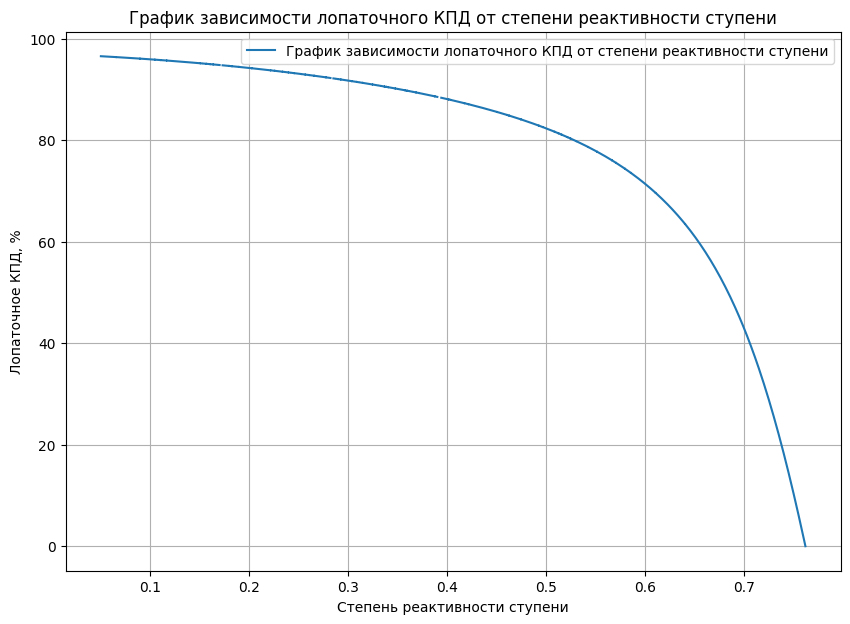

In [99]:
kpd_1 = []
degree_of_reactio_1 = []
kpd_2 = []
degree_of_reactio_2 = []
kpd_3 = []
degree_of_reactio_3 = []
for degree_of_reaction in po:
# Основной расчет
    i = i + 1
    inlet_point = gas(P=p_0 * unit, T=t_0)
    outlet_point = gas(P=p_2 * unit, s=inlet_point.s)
    theoretical_heat_drop = inlet_point.h - outlet_point.h
    stator_heat_drop = theoretical_heat_drop * (1 - degree_of_reaction) 
    rotor_heat_drop = theoretical_heat_drop * degree_of_reaction
    

    c_1t = (2 * 1000 * stator_heat_drop) ** 0.5
    c_1 = c_1t * fi
    u = math.pi * D_cp * rotation_speed

    sin_alpha_1 = math.sin(math.radians(alf_1_ср))
    cos_alpha_1 = math.cos(math.radians(alf_1_ср))

    w_1 = (c_1 ** 2 + u ** 2 - 2 * c_1 * u * cos_alpha_1) ** 0.5
    w_2t = (w_1 ** 2 + 2 * rotor_heat_drop * 1000) ** 0.5
    w_2 = w_2t * psi

# Введем дополнительный расчёт, чтобы избежать отрицательных 
# значений углов в треугольнике скоростей( Прямоугольный треугольник, образованный катедами а,b и гипотенузой с)
    a = cos_alpha_1 * c_1-u # Катед прилегающий к углу бетта 1 
    c = w_1 # Гипотенуза треугольника
    beta_1 = math.acos(a/c)
    beta_1_deg = math.degrees(beta_1)
    sin_beta_1 = math.sin(math.radians(beta_1_deg))
    cos_beta_1 = math.cos(math.radians(beta_1_deg))
    beta_2_deg = beta_1_deg - delta_beta_deg
    sin_beta_2 = math.sin(math.radians(beta_2_deg))
    cos_beta_2 = math.cos(math.radians(beta_2_deg))
    
    c_2 = (w_2 ** 2 + u ** 2 - 2 * w_2 * u * cos_beta_2) ** 0.5
    
    outlet_speed_loss = 0.5 * c_2 ** 2
    stator_speed_loss = 0.5 * ((c_1t ** 2) - (c_1 ** 2))
    rotor_speed_loss = 0.5 * ((w_2t ** 2) - (w_2 ** 2))
# Ввел дополнительный расчёт, чтобы избежать отрицательных 
# значений углов в треугольнике скоростей (Прямоугольный треугольник, образованный катедами а,b и гипотенузой с)
    a = sin_beta_2 * w_2 # Катет напротив угла альфа 2 
    c = c_2 #Гипотенуза треугольника
    alpha_2 = math.asin(a/c)
    alpha_2_deg = math.degrees(alpha_2)
    cos_alpha_2 = math.cos(math.radians(alpha_2_deg))

# Расчет лопаточного КПД 
 
    constant_part_1 = theoretical_heat_drop * 1000 - stator_speed_loss - rotor_speed_loss
    useful_energy_1 = constant_part_1 - outlet_speed_loss
    kpdd_1 = useful_energy_1 / constant_part_1 * 100
    

# В случае невозможности вычислить треугольники скоросте, необходимо заменить лопаточный КПД на None 
#(при данном значении степени реактивности)
    absolute_projection = c_1 * cos_alpha_1 + c_2 * math.cos(alpha_2)
    relative_projection = w_1 * math.cos(beta_1) + w_2 * cos_beta_2
    if kpdd_1 > 0:
     kpd_1.append(kpdd_1)
     degree_of_reactio_1.append(degree_of_reaction)
     if absolute_projection == relative_projection: 
      kpd_1.append(None)
      degree_of_reactio_1.append(degree_of_reaction)
    

fig, graf = plt.subplots(1, 1, figsize=(10, 7))
plt.title("График зависимости лопаточного КПД от степени реактивности ступени")
plt.xlabel("Степень реактивности ступени")
plt.ylabel("Лопаточное КПД, %")
plt.plot(degree_of_reactio_1 ,kpd_1, label = 'График зависимости лопаточного КПД от степени реактивности ступени')
plt.grid()
plt.legend()